In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import folium

C:\Users\justi\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 18 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


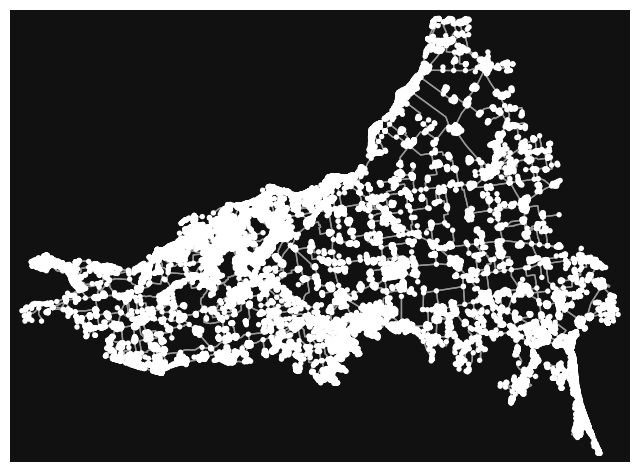

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
ox.plot_graph(ox.graph_from_place('Kherson, Ukraine'))

In [19]:
G = ox.graph_from_place('Kherson, Ukraine', network_type="drive")
G

C:\Users\justi\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 18 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [20]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

y          x  street_count   highway  \
osmid                                                      
60424300    45.865247  34.904362             3       NaN   
729552411   45.876488  34.896749             3  bus_stop   
729627219   45.799516  34.949031             1       NaN   
1308879665  45.983996  34.848552             3       NaN   
1439024586  45.889046  34.885472             3       NaN   

                             geometry  
osmid                                  
60424300    POINT (34.90436 45.86525)  
729552411   POINT (34.89675 45.87649)  
729627219   POINT (34.94903 45.79952)  
1308879665  POINT (34.84855 45.98400)  
1439024586  POINT (34.88547 45.88905)

In [21]:
gdf_edges.head()

osmid       highway  oneway reversed    length  \
u         v          key                                                       
60424300  729627219  0     58872732  unclassified   False    False  8189.814   
          729552411  0     58872732  unclassified   False     True  1387.150   
          1790916410 0    142780003   residential   False     True  1402.942   
729552411 4487620268 0    167710371   residential   False     True    68.867   
          60424300   0     58872732  unclassified   False    False  1387.150   

                                                                   geometry  \
u         v          key                                                      
60424300  729627219  0    LINESTRING (34.90436 45.86525, 34.90478 45.864...   
          729552411  0    LINESTRING (34.90436 45.86525, 34.90420 45.865...   
          1790916410 0    LINESTRING (34.90436 45.86525, 34.90435 45.865...   
729552411 4487620268 0    LINESTRING (34.89675 45.87649, 34.89757 45.87673)   
          60424300   0    LINESTRING (34.89675 45.87649, 34.89760 45.875...   

                         lanes             name width  ref maxspeed bridge  \
u         v          key                                                     
60424300  729627219  0     NaN              NaN   NaN  NaN      NaN    NaN   
          729552411  0     NaN              NaN   NaN  NaN      NaN    NaN   
          1790916410 0       1  Береговая улица     6  NaN      NaN    NaN   
729552411 4487620268 0     NaN              NaN   NaN  NaN      NaN    NaN   
          60424300   0     NaN              NaN   NaN  NaN      NaN    NaN   

                         junction access area  
u         v          key                       
60424300  729627219  0        NaN    NaN  NaN  
          729552411  0        NaN    NaN  NaN  
          1790916410 0        NaN    NaN  NaN  
729552411 4487620268 0        NaN    NaN  NaN  
          60424300   0        NaN    NaN  NaN

In [24]:
# Отримання геометрій для різних об'єктів в місті Kherson, таких як amenity, building та highway
gdf = ox.features_from_place("Kherson, Ukraine", tags={"amenity": True, "building": True, "highway": True})

C:\Users\justi\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 18 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [33]:
# Задайте ваші параметри фільтрації та регіон
tags = {"amenity": True, "building": True, "highway": True}
place_name = "Kherson, Ukraine"

# Отримання геоданих за вказаними тегами та в межах вказаного регіону
gdf = ox.geometries_from_place(place_name, tags)

# Опрацьовуйте результати, як вам потрібно
print(gdf.head())


C:\Users\justi\AppData\Local\Temp\ipykernel_12700\349654150.py:6: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place_name, tags)
C:\Users\justi\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 18 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


                        source                   geometry         amenity  \
element_type osmid                                                          
node         729552410     NaN  POINT (34.87355 45.90105)  drinking_water   
             729552411     NaN  POINT (34.89675 45.87649)             NaN   
             729627261     NaN  POINT (34.96742 45.76996)            cafe   
             1341953527    NaN  POINT (34.84683 45.98976)             NaN   
             1341953756    NaN  POINT (34.84617 45.99199)             NaN   

                        bench   highway shelter  bus         name  \
element_type osmid                                                  
node         729552410    NaN       NaN     NaN  NaN          NaN   
             729552411    yes  bus_stop     yes  NaN          NaN   
             729627261    NaN       NaN     NaN  NaN          NaN   
             1341953527   yes  bus_stop     yes  yes  Водолікарня   
             1341953756   yes  bus_stop     ye

In [34]:
gdf['highway'].unique()

array([nan, 'bus_stop', 'crossing', 'tertiary', 'unclassified', 'track',
       'footway', 'service', 'path', 'residential', 'pedestrian',
       'motorway_junction', 'emergency_access_point', 'secondary',
       'trunk', 'turning_loop', 'rest_area', 'trunk_link', 'primary',
       'traffic_signals', 'turning_circle', 'stop', 'secondary_link',
       'steps', 'raceway', 'tertiary_link', 'living_street', 'milestone',
       'street_lamp', 'give_way', 'road', 'proposed', 'primary_link',
       'bridleway', 'cycleway', 'speed_camera', 'traffic_mirror',
       'construction'], dtype=object)

In [35]:
gdf['amenity'].unique()

array(['drinking_water', nan, 'cafe', 'bar', 'toilets', 'pharmacy',
       'payment_terminal', 'waste_disposal', 'post_office', 'fast_food',
       'shelter', 'cinema', 'community_centre', 'townhall',
       'kindergarten', 'marketplace', 'school', 'hospital',
       'place_of_worship', 'restaurant', 'pub', 'resort', 'grave_yard',
       'parking', 'telephone', 'atm', 'fountain', 'recycling', 'shower',
       'library', 'clinic', 'nightclub', 'biergarten', 'bench',
       'car_wash', 'bicycle_rental', 'doctors', 'fuel', 'police',
       'fire_station', 'bicycle_parking', 'bank', 'taxi',
       'charging_station', 'dentist', 'water_point', 'ferry_terminal',
       'bus_station', 'boat_rental', 'veterinary', 'college',
       'driving_school', 'ice_cream', 'courthouse', 'food_court',
       'arts_centre', 'university', 'mortuary', 'animal_breeding',
       'vending_machine', 'training', 'social_facility', 'music_school',
       'monastery', 'ranger_station', 'waste_basket', 'post_box',
 

In [36]:
gdf['building'].unique()

array([nan, 'yes', 'bungalow', 'residential', 'office', 'school',
       'kindergarten', 'hotel', 'roof', 'house', 'garage', 'service',
       'church', 'apartments', 'chapel', 'ruins', 'hospital',
       'train_station', 'warehouse', 'retail', 'construction', 'toilets',
       'garages', 'commercial', 'bomb_shelters', 'barn', 'industrial',
       'dormitory', 'kiosk', 'college', 'greenhouse', 'university',
       'shed', 'boathouse', 'hangar', 'farm', 'silo', 'farm_auxiliary',
       'tribune', 'sty', 'collapsed', 'detached', 'bunker', 'manufacture',
       'museum', 'cathedral', 'police', 'public', 'courthouse', 'library',
       'clinic', 'supermarket', 'hut', 'grandstand', 'shop', 'carport',
       'townhall', 'civic', 'cowshed', 'guest_house', 'government',
       'semidetached_house', 'sports_centre', 'terrace', 'stadium',
       'synagogue', 'temple', 'theatre', 'factory', 'pavilion'],
      dtype=object)

In [37]:
gdf['building'].value_counts()

building
yes              55402
house             6709
apartments        1314
industrial        1038
garages            424
                 ...  
bomb_shelters        1
police               1
cathedral            1
manufacture          1
pavilion             1
Name: count, Length: 69, dtype: int64

In [38]:
a = gdf['amenity'].value_counts()
a[a.index=='school']

amenity
school    264
Name: count, dtype: int64

In [39]:
gdf[gdf["building"].isin(['residential', 'apartments', 'house'])]

source  \
element_type osmid               
way          167321841     NaN   
             169463911     NaN   
             169463927     NaN   
             361675944     NaN   
             632113293     NaN   
...                        ...   
             1103961884    NaN   
             1103961885    NaN   
             1103961886    NaN   
             1103961887    NaN   
             1103961888    NaN   

                                                                  geometry  \
element_type osmid                                                           
way          167321841   POLYGON ((34.88394 45.90889, 34.88425 45.90896...   
             169463911   POLYGON ((34.87272 45.90426, 34.87281 45.90414...   
             169463927   POLYGON ((34.87268 45.90439, 34.87285 45.90445...   
             361675944   POLYGON ((34.87436 45.90539, 34.87448 45.90544...   
             632113293   POLYGON ((34.88487 45.89358, 34.88490 45.89355...   
...                                                                    ...   
             1103961884  POLYGON ((32.25224 46.80741, 32.25212 46.80733...   
             1103961885  POLYGON ((32.25273 46.80709, 32.25261 46.80701...   
             1103961886  POLYGON ((32.25163 46.80632, 32.25152 46.80641...   
             1103961887  POLYGON ((32.25221 46.80571, 32.25212 46.80565...   
             1103961888  POLYGON ((32.25116 46.80592, 32.25107 46.80585...   

                        amenity bench highway shelter  bus     name name:ru  \
element_type osmid                                                            
way          167321841      NaN   NaN     NaN     NaN  NaN      NaN     NaN   
             169463911      NaN   NaN     NaN     NaN  NaN      NaN     NaN   
             169463927      NaN   NaN     NaN     NaN  NaN      NaN     NaN   
             361675944      NaN   NaN     NaN     NaN  NaN      NaN     NaN   
             632113293      NaN   NaN     NaN     NaN  NaN  Sunrise     NaN   
...                         ...   ...     ...     ...  ...      ...     ...   
             1103961884     NaN   NaN     NaN     NaN  NaN      NaN     NaN   
             1103961885     NaN   NaN     NaN     NaN  NaN      NaN     NaN   
             1103961886     NaN   NaN     NaN     NaN  NaN      NaN     NaN   
             1103961887     NaN   NaN     NaN     NaN  NaN      NaN     NaN   
             1103961888     NaN   NaN     NaN     NaN  NaN      NaN     NaN   

                         name:uk  ... turn:lanes:forward informal  \
element_type osmid                ...                               
way          167321841       NaN  ...                NaN      NaN   
             169463911       NaN  ...                NaN      NaN   
             169463927       NaN  ...                NaN      NaN   
             361675944       NaN  ...                NaN      NaN   
             632113293   Sunrise  ...                NaN      NaN   
...                          ...  ...                ...      ...   
             1103961884      NaN  ...                NaN      NaN   
             1103961885      NaN  ...                NaN      NaN   
             1103961886      NaN  ...                NaN      NaN   
             1103961887      NaN  ...                NaN      NaN   
             1103961888      NaN  ...                NaN      NaN   

                        parking:orientation step_count orientation name:ang  \
element_type osmid                                                            
way          167321841                  NaN        NaN         NaN      NaN   
             169463911                  NaN        NaN         NaN      NaN   
             169463927                  NaN        NaN         NaN      NaN   
             361675944                  NaN        NaN         NaN      NaN   
             632113293                  NaN        NaN         NaN      NaN   
...                                     ...        ...         ...      ...   
        

In [40]:
gdf[['place']]

place
element_type osmid           
node         729552410    NaN
             729552411    NaN
             729627261    NaN
             1341953527   NaN
             1341953756   NaN
...                       ...
way          855851935    NaN
             855851936    NaN
             855851937    NaN
             855862424    NaN
             856146817    NaN

[114979 rows x 1 columns]

In [41]:
schools = gdf[gdf["amenity"] == "school"]
hospitals = gdf[gdf["amenity"] == "hospital"]
roads = gdf[gdf["highway"].isin(['primary', 'secondary', 'road', 'residential', 'pedestrian'])]
residential = gdf[gdf["building"].isin(['residential', 'apartments', 'house'])]

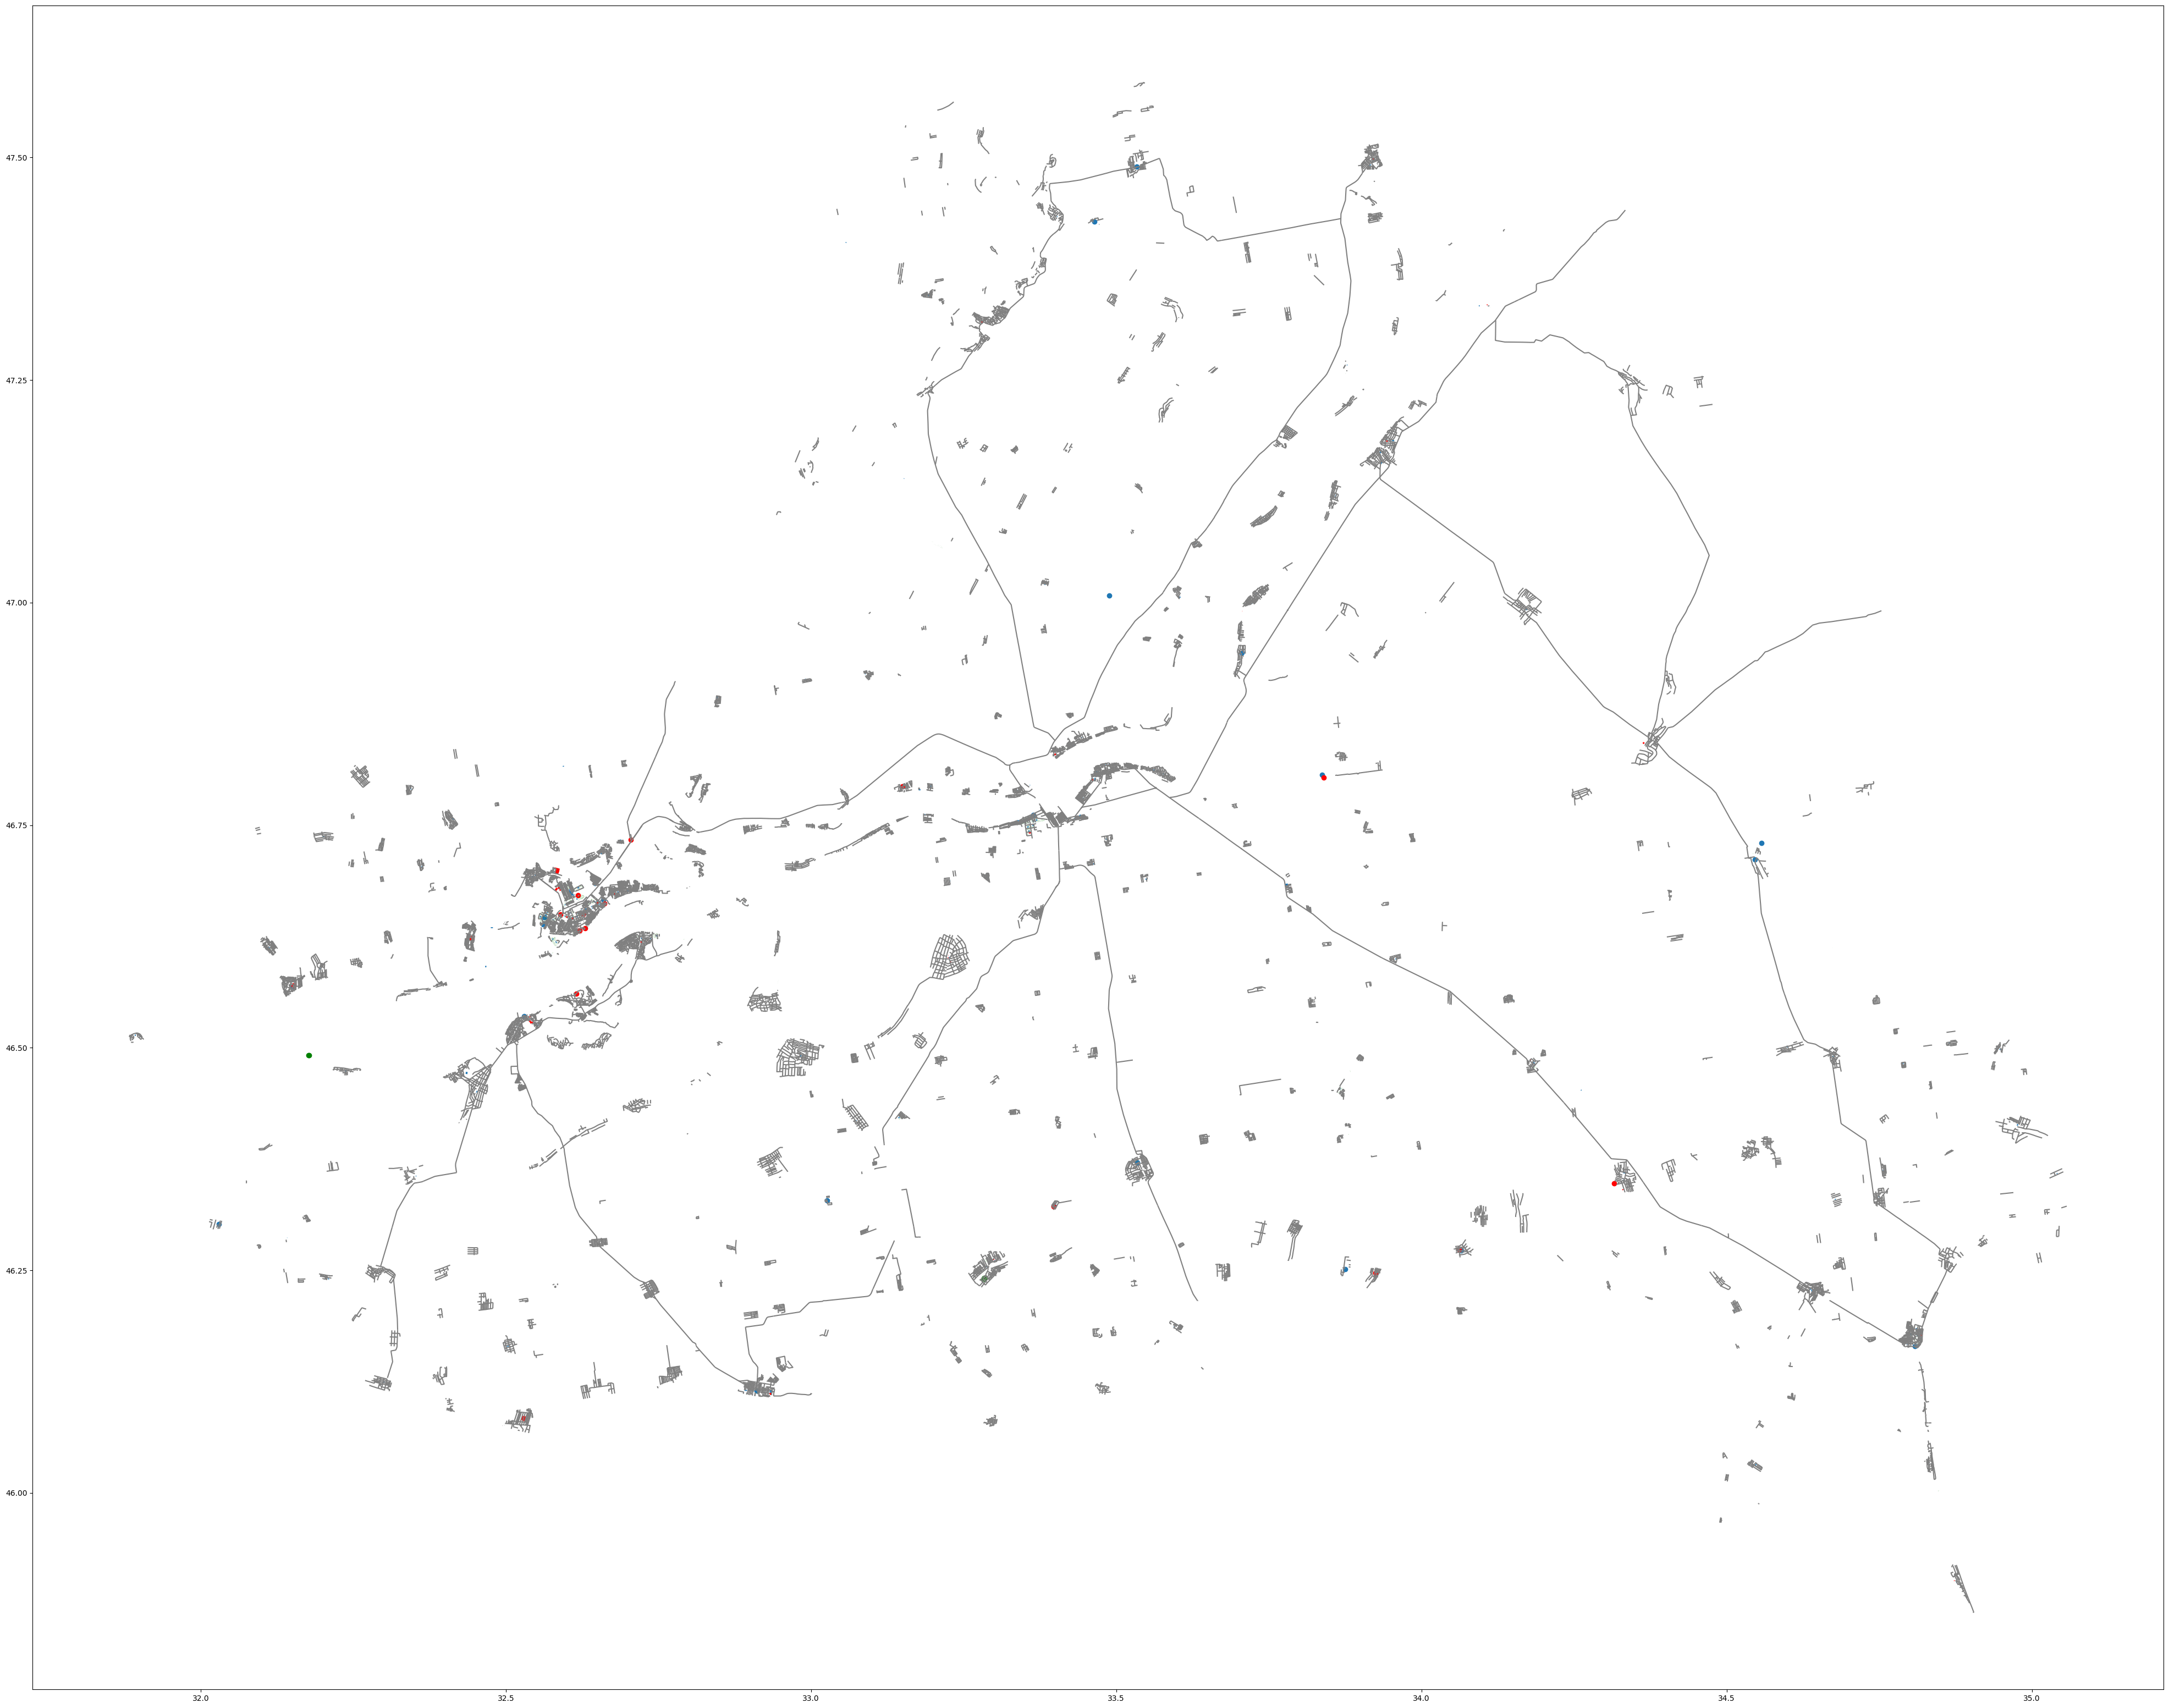

In [42]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
schools.plot(ax=ax, figsize=(50,50))
hospitals.plot(ax=ax, figsize=(50,50), color='red')
roads.plot(ax=ax, figsize=(50,50), color='grey')
residential.plot(ax=ax, figsize=(50,50), color='green')

fig.set_figwidth(50)
fig.set_figheight(50)
plt.show()

<Axes: >

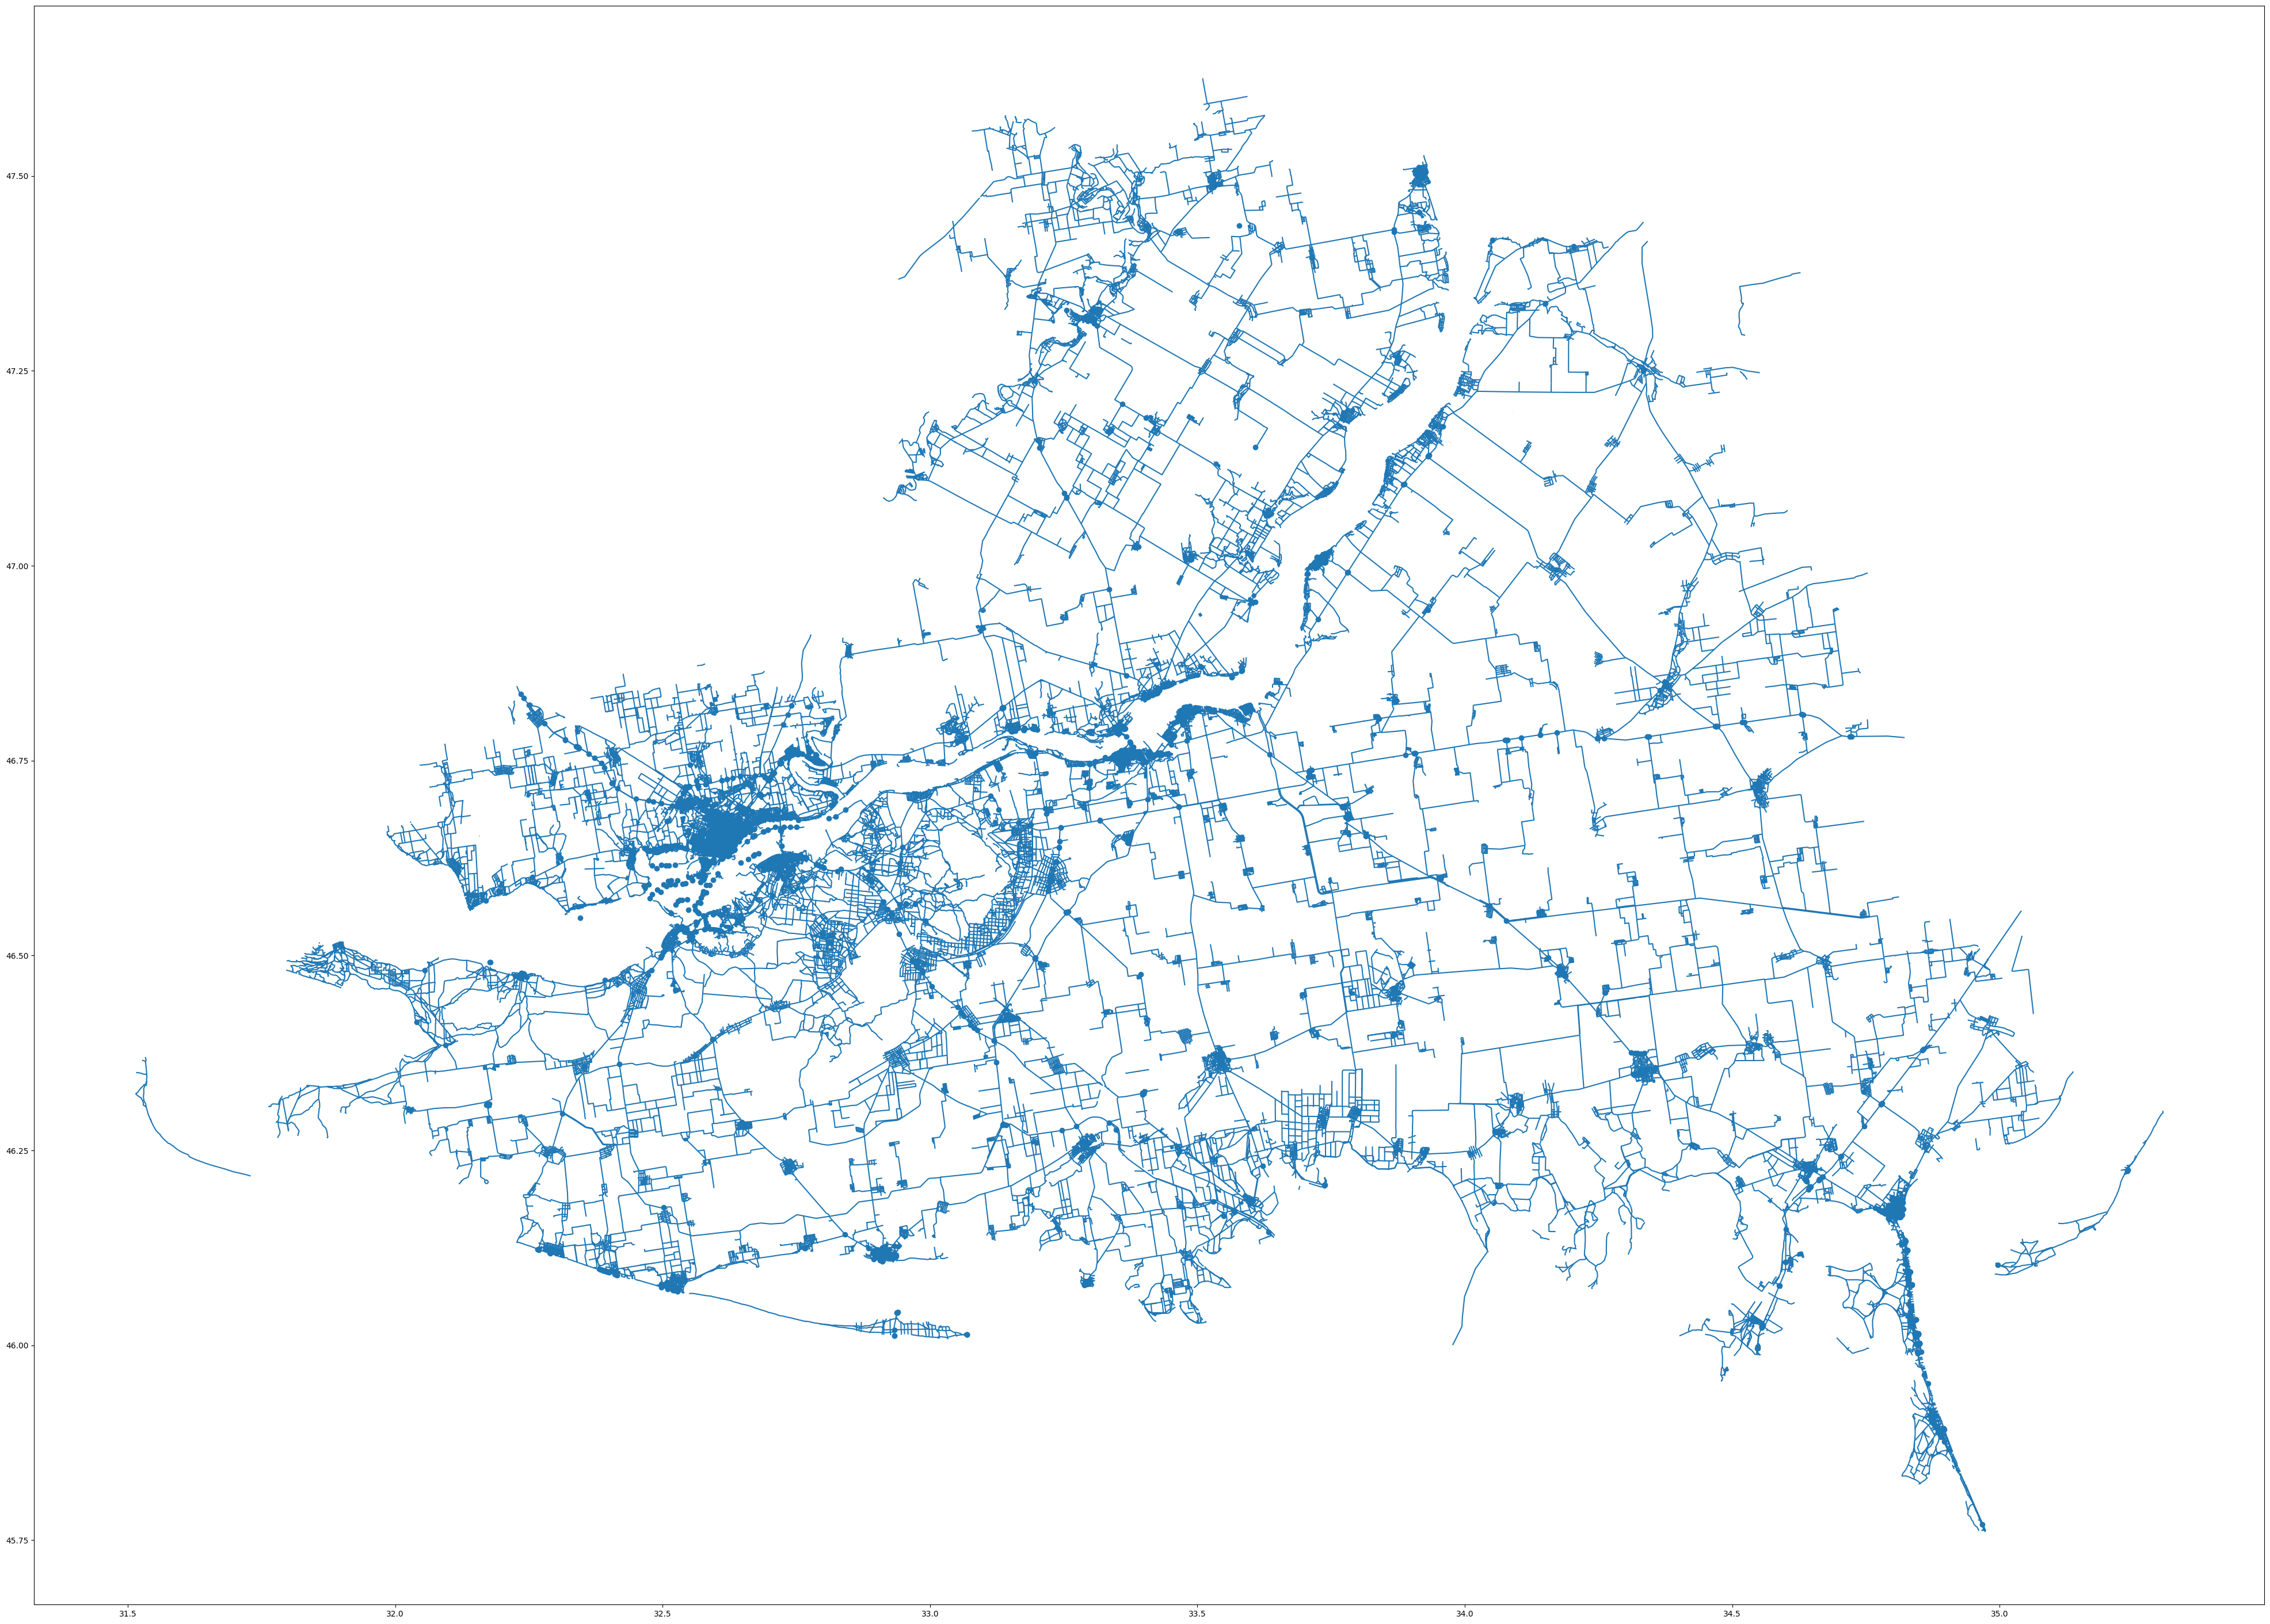

In [43]:
gdf.plot(figsize=(50,50), legend=True)

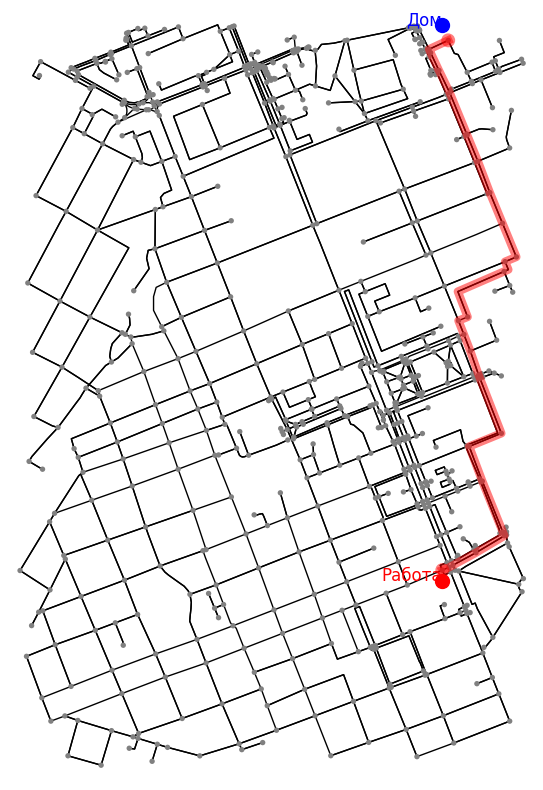

In [7]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Задаем границы области (северо-западная и юго-восточная точки)
north = 46.65
south = 46.63
east = 32.62
west = 32.60

# Получаем граф для указанной области
G = ox.graph_from_bbox(north, south, east, west, network_type='all')

# Задаем координаты точек
point1 = (46.6350, 32.6167)
point2 = (46.6500, 32.6167)

# Получаем ближайшие узлы к заданным точкам
node1 = ox.distance.nearest_nodes(G, point1[1], point1[0])
node2 = ox.distance.nearest_nodes(G, point2[1], point2[0])

# Поиск кратчайшего пути между узлами
shortest_path = nx.shortest_path(G, node1, node2, weight='length')

# Отрисовка графа с изменением фона на белый
fig, ax = ox.plot_graph(G, bgcolor='w', figsize=(10, 10), node_color='gray', edge_color='k', show=False, close=False)

# Выделение точек и добавление подписей
ax.scatter(point1[1], point1[0], c='r', s=100, marker='o', zorder=5)
ax.scatter(point2[1], point2[0], c='b', s=100, marker='o', zorder=5)
ax.text(point1[1], point1[0], 'Работа', fontsize=12, ha='right', color='r', zorder=10)
ax.text(point2[1], point2[0], 'Дом', fontsize=12, ha='right', color='b', zorder=10)

# Построение кратчайшего пути
ox.plot_graph_route(G, shortest_path, route_linewidth=6, node_size=0, ax=ax, bgcolor='w', edge_color='r')

# Отображение графа
plt.show()
